# Pew Research Center 

- TikTok users

In [42]:
# remotes::install_github("sdaza/autumn-adjustments")

In [43]:
library(data.table)
library(autumn)
library(weights)
library(survey)

# Read data

In [6]:
dat = fread("../../data/2023-24/pew-research-2021.csv")
dat = dat[, .(respid, sample, comp, int_date, state, density, usr, age, 
    sex, gender, racecmb, web1j, weight)]
dat[, tiktok := ifelse(web1j==1, 1, 0)]

In [7]:
print(wpct(dat$tiktok))

        0         1 
0.8348868 0.1651132 


In [8]:
print(wpct(dat$tiktok, dat$weight))

        0         1 
0.7903955 0.2096045 


In [9]:
print(wpct(dat$sex, dat$weight))

        1         2 
0.4956115 0.5043885 


In [12]:
autumn::design_effect(dat$weight)

[1] 1.343236

In [13]:
autumn::effective_sample_size(dat$weight)

[1] 1118.195

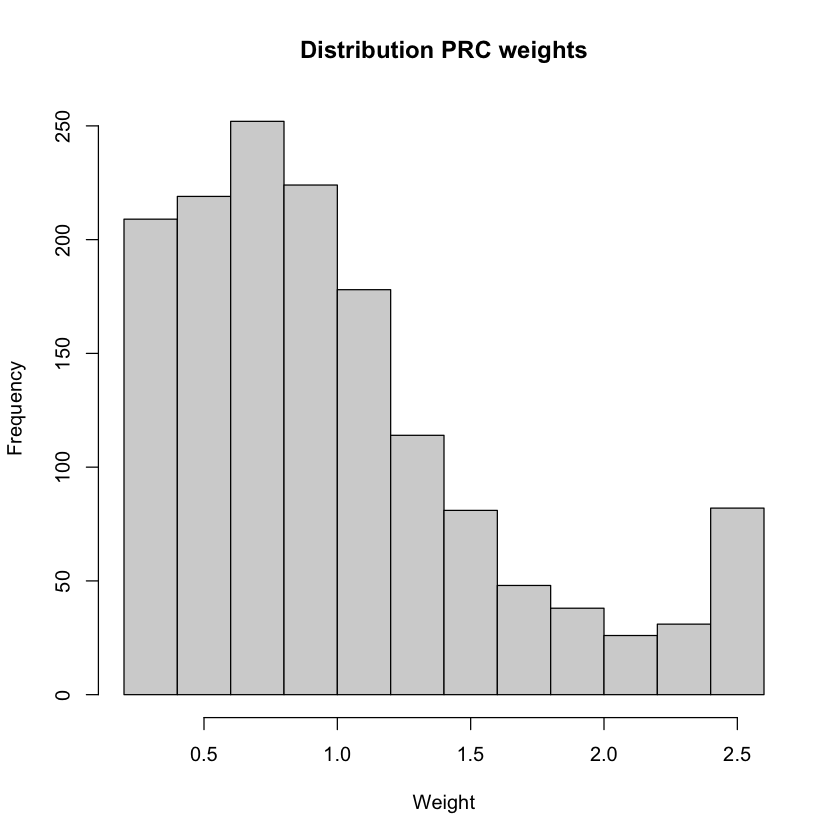

In [16]:
hist(dat$weight, main="Distribution PRC weights", xlab="Weight")

In [17]:
sum(dat$weight)

[1] 1502

In [21]:
# standard error estimation
d = svydesign(ids=~1, strata=~state+sample,data=dat, weights=~weight)
s = svymean(~tiktok, d)
print(confint(s))

           2.5 %    97.5 %
tiktok 0.1844557 0.2347533


# Raking 

- Let's create a mock example to use ranking on top of existing weights

In [22]:
library(autumn)

In [23]:
table(dat$sex)


  1   2 
865 637 

In [25]:
table(dat$racecmb)


   1    2    3    4    5    9 
1119  127   46   61   93   56 

In [27]:
target = list(
    sex = c('1'=0.5, '2'=0.5), 
    racecmb = c('1'=0.60, '2'=0.20, '3'=0.10, '4'=0.05, '5'=0.04, '9'=0.01)
)
target = normalize(target)

In [34]:
result = harvest(dat, target, weight_column = 'new_weights', start_weights=dat$weight)
diagnose_weights(result, target, result$new_weight)

variable,level,prop_original,prop_weighted,target,error_original,error_weighted
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sex,1,0.57589880,0.49682778,0.50,0.075898802,3.172219e-03
sex,2,0.42410120,0.50317222,0.50,0.075898802,3.172219e-03
racecmb,1,0.74500666,0.60391767,0.60,0.145006658,3.917666e-03
racecmb,2,0.08455393,0.20130589,0.20,0.115446072,1.305889e-03
racecmb,3,0.03062583,0.09412350,0.10,0.069374168,5.876499e-03
racecmb,4,0.04061252,0.05032647,0.05,0.009387483,3.264721e-04
racecmb,5,0.06191744,0.04026118,0.04,0.021917443,2.611777e-04
racecmb,9,0.03728362,0.01006529,0.01,0.027283622,6.529443e-05


In [39]:
sum(result$new_weights)

[1] 1502

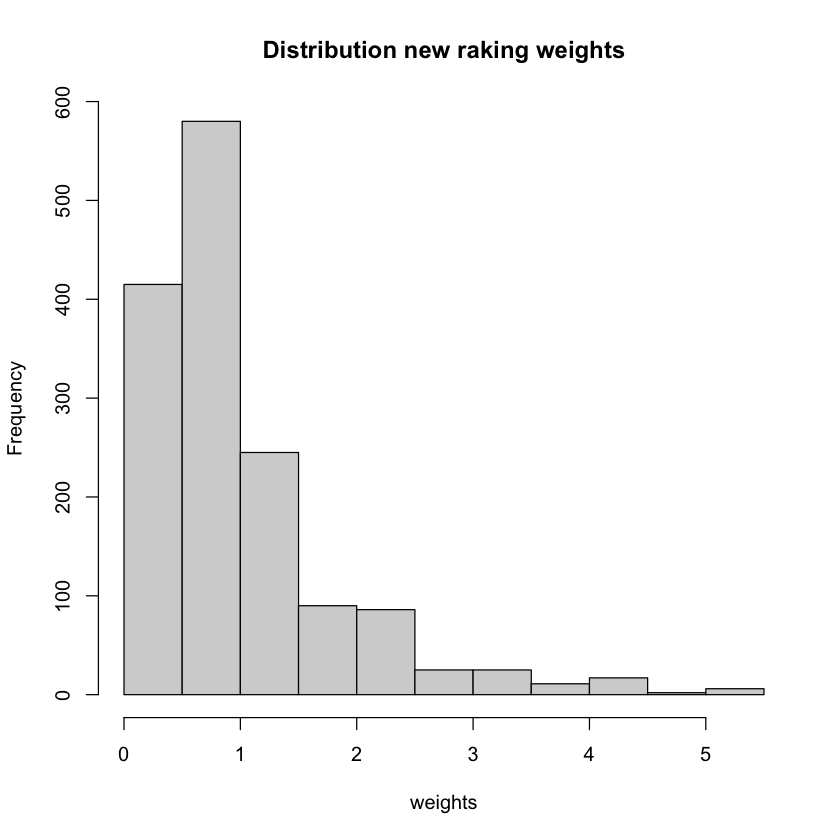

In [36]:
hist(result$new_weights, main="Distribution new raking weights", xlab="weights")

In [37]:
design_effect(result$new_weights)

[1] 1.66342

In [38]:
effective_sample_size(result$new_weights)

[1] 902.9592

In [33]:
# standard error estimation
d = svydesign(ids=~1, strata=~state+sample,data=result, weights=~new_weight)
s = svymean(~tiktok, d)
s

          mean     SE
tiktok 0.21763 0.0145